In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
params = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'eval_metric': 'auc',
    'eta': 0.1,
    'min_child_weight': 1,
}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 50

In [3]:
bst = xgb.train(params,dtrain, num_round,watchlist)

[0]	eval-auc:0.99381	train-auc:0.98800
[1]	eval-auc:0.99381	train-auc:0.99542
[2]	eval-auc:0.99492	train-auc:0.99555
[3]	eval-auc:0.99460	train-auc:0.99554
[4]	eval-auc:0.99460	train-auc:0.99565
[5]	eval-auc:0.99428	train-auc:0.99575
[6]	eval-auc:0.99428	train-auc:0.99590
[7]	eval-auc:0.99428	train-auc:0.99848
[8]	eval-auc:0.99397	train-auc:0.99853
[9]	eval-auc:0.99365	train-auc:0.99848
[10]	eval-auc:0.99428	train-auc:0.99883
[11]	eval-auc:0.99460	train-auc:0.99929
[12]	eval-auc:0.99428	train-auc:0.99931
[13]	eval-auc:0.99428	train-auc:0.99952
[14]	eval-auc:0.99492	train-auc:0.99964
[15]	eval-auc:0.99428	train-auc:0.99960
[16]	eval-auc:0.99397	train-auc:0.99971
[17]	eval-auc:0.99428	train-auc:0.99967
[18]	eval-auc:0.99460	train-auc:0.99967
[19]	eval-auc:0.99492	train-auc:0.99971
[20]	eval-auc:0.99524	train-auc:0.99975
[21]	eval-auc:0.99555	train-auc:0.99979
[22]	eval-auc:0.99555	train-auc:0.99981
[23]	eval-auc:0.99524	train-auc:0.99987
[24]	eval-auc:0.99555	train-auc:0.99985
[25]	eval-

F:\envs\ML\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [4]:
importance = bst.get_fscore()
print(importance)

{'f0': 4.0, 'f1': 26.0, 'f4': 13.0, 'f5': 2.0, 'f6': 4.0, 'f7': 22.0, 'f8': 1.0, 'f9': 2.0, 'f10': 13.0, 'f12': 7.0, 'f13': 40.0, 'f14': 10.0, 'f15': 14.0, 'f16': 4.0, 'f17': 3.0, 'f18': 9.0, 'f19': 3.0, 'f20': 25.0, 'f21': 57.0, 'f22': 20.0, 'f23': 35.0, 'f24': 15.0, 'f25': 4.0, 'f26': 17.0, 'f27': 31.0, 'f28': 9.0, 'f29': 8.0}


In [10]:
importance = sorted(importance.items(),key= lambda x : x[1], reverse=True)
importance = pd.DataFrame(importance,columns=['feature','importance'])

In [11]:
print(importance)

   feature  importance
0      f21        57.0
1      f13        40.0
2      f23        35.0
3      f27        31.0
4       f1        26.0
5      f20        25.0
6       f7        22.0
7      f22        20.0
8      f26        17.0
9      f24        15.0
10     f15        14.0
11      f4        13.0
12     f10        13.0
13     f14        10.0
14     f18         9.0
15     f28         9.0
16     f29         8.0
17     f12         7.0
18      f0         4.0
19      f6         4.0
20     f16         4.0
21     f25         4.0
22     f17         3.0
23     f19         3.0
24      f5         2.0
25      f9         2.0
26      f8         1.0


In [12]:
importance_gain = bst.get_score(importance_type='gain')
importance_cover = bst.get_score(importance_type='cover')
print(importance_cover)
print(importance_gain)

{'f0': 31.331314086914062, 'f1': 9.380462646484375, 'f4': 4.472620964050293, 'f5': 7.716960906982422, 'f6': 4.322600841522217, 'f7': 40.18156433105469, 'f8': 2.4339699745178223, 'f9': 2.8687117099761963, 'f10': 11.526849746704102, 'f12': 23.342348098754883, 'f13': 21.245330810546875, 'f14': 32.69927978515625, 'f15': 6.169063091278076, 'f16': 3.119030475616455, 'f17': 2.718057632446289, 'f18': 10.372382164001465, 'f19': 14.254237174987793, 'f20': 19.586702346801758, 'f21': 14.511909484863281, 'f22': 29.082584381103516, 'f23': 15.948540687561035, 'f24': 13.659621238708496, 'f25': 14.678604125976562, 'f26': 22.495100021362305, 'f27': 28.480792999267578, 'f28': 9.117016792297363, 'f29': 4.268739223480225}
{'f0': 5.005335807800293, 'f1': 3.0115647315979004, 'f4': 1.3749351501464844, 'f5': 0.7457011938095093, 'f6': 0.4154798090457916, 'f7': 47.92652893066406, 'f8': 0.19219768047332764, 'f9': 0.9413580298423767, 'f10': 2.50227689743042, 'f12': 1.416028380393982, 'f13': 1.9964017868041992, 'f1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

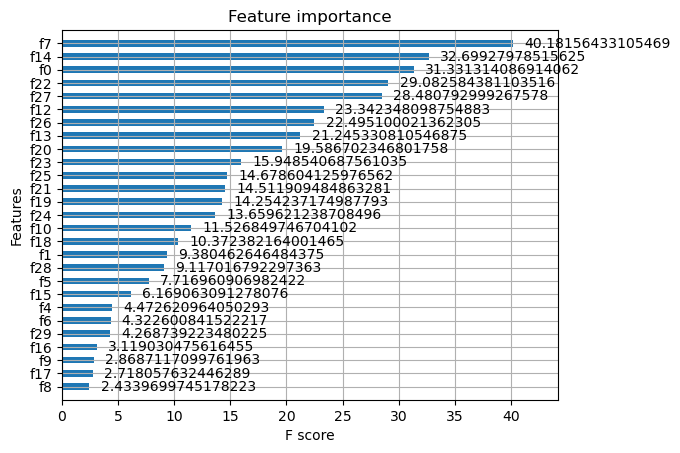

In [16]:
from matplotlib import pyplot as plt
xgb.plot_importance(bst,height=0.5,importance_type='cover')

In [27]:
model = xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',eval_metric='auc',learning_rate=0.1,n_estimators=50,max_depth=5
                          , silent=False,random_state=0)
model.fit(X_train,y_train)

F:\envs\ML\lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:11] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [22]:
y_pred = model.predict(X_test)
rocauc = roc_auc_score(y_test,y_pred)
print(rocauc)


0.9669736424261671
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


In [24]:
importances = model.feature_importances_
print(importance)

   feature  importance
0      f21        57.0
1      f13        40.0
2      f23        35.0
3      f27        31.0
4       f1        26.0
5      f20        25.0
6       f7        22.0
7      f22        20.0
8      f26        17.0
9      f24        15.0
10     f15        14.0
11      f4        13.0
12     f10        13.0
13     f14        10.0
14     f18         9.0
15     f28         9.0
16     f29         8.0
17     f12         7.0
18      f0         4.0
19      f6         4.0
20     f16         4.0
21     f25         4.0
22     f17         3.0
23     f19         3.0
24      f5         2.0
25      f9         2.0
26      f8         1.0


In [25]:
thresholds = []
for i in importances:
    if i not in thresholds:
        thresholds.append(i)
print(thresholds)

[np.float32(0.036932927), np.float32(0.022221467), np.float32(0.0), np.float32(0.010145249), np.float32(0.005502314), np.float32(0.0030657055), np.float32(0.353636), np.float32(0.0014181711), np.float32(0.006946009), np.float32(0.018463578), np.float32(0.010448464), np.float32(0.014730872), np.float32(0.0038063303), np.float32(0.0089692455), np.float32(0.0064064777), np.float32(0.0033726138), np.float32(0.010152942), np.float32(0.015135064), np.float32(0.032864705), np.float32(0.015984925), np.float32(0.13692057), np.float32(0.03060453), np.float32(0.011372289), np.float32(0.002570745), np.float32(0.045184925), np.float32(0.18454099), np.float32(0.0048303897), np.float32(0.003772543)]


In [26]:
thresholds = sorted(thresholds)

In [33]:
from sklearn.feature_selection import SelectFromModel
for threshold in thresholds:
    selection = SelectFromModel(model, threshold=threshold,prefit=True)
    print(selection.get_support(True))
    selected_X_train = selection.transform(X_train)
    selected_X_test = selection.transform(X_test)
    model2 = xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',eval_metric='auc',max_depth=5,learning_rate=0.1,n_estimators =50)
    model2.fit(selected_X_train,y_train)
    y_pred = model2.predict(selected_X_test)
    rocauc = roc_auc_score(y_test,y_pred)
    print(str(threshold) + '    '+ str(selected_X_train.shape[1]) + '    ' + str(rocauc))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
0.0    30    0.9669736424261671
[ 0  1  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29]
0.0014181711    27    0.9669736424261671
[ 0  1  4  5  6  7  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29]
0.002570745    26    0.9669736424261671
[ 0  1  4  5  6  7  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28
 29]
0.0030657055    25    0.9744363289933311
[ 0  1  4  5  7  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29]
0.0033726138    24    0.9850746268656716
[ 0  1  4  5  7  9 10 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28 29]
0.003772543    23    0.9850746268656716
[ 0  1  4  5  7  9 10 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28]
0.0038063303    22    0.9744363289933311
[ 0  1  4  5  7  9 10 12 13 15 16 18 19 20 21 22 23 24 26 27 28]
0.0048303897    21    0.9850746268656716
[ 0  1  4  5  7  9 10 12 13 15 16 18 19 20 21 22 23 24 26 27]
0.00550

In [37]:
pred_contrib = model.predict(X_test,pred_contribs=True)
print(pred_contrib)

TypeError: predict() got an unexpected keyword argument 'pred_contribs'